# Upper Confidence Bound

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

In [2]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
Ad 1     10000 non-null int64
Ad 2     10000 non-null int64
Ad 3     10000 non-null int64
Ad 4     10000 non-null int64
Ad 5     10000 non-null int64
Ad 6     10000 non-null int64
Ad 7     10000 non-null int64
Ad 8     10000 non-null int64
Ad 9     10000 non-null int64
Ad 10    10000 non-null int64
dtypes: int64(10)
memory usage: 781.4 KB


In [5]:
df.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Method

In [6]:
number_of_rounds = df.shape[0]
number_of_ads = df.shape[1]

number_of_selections = [0 for i in range(number_of_ads)]
sums_of_rewards = [0 for i in range(number_of_ads)]

In [7]:
def find_highest_ucb(selections, rewards, rounds):
    means = [reward/n if n!=0 else 0 for reward, n in zip(rewards, selections)]
    delta = lambda rounds, n: np.sqrt(1.5*np.log(rounds+1)/n)
    ucb = np.array(
        [mean_reward+delta(rounds, n) if n!=0 else 1e400 for mean_reward, n in zip(means, selections)])
    return ucb.argmax()

In [8]:
ad_selected = []
for i in range(number_of_rounds):
    index = find_highest_ucb(number_of_selections, sums_of_rewards, i)
    ad_selected.append(index)
    number_of_selections[index]+=1
    sums_of_rewards[index]+=df.iloc[i,index]

In [9]:
sums_of_rewards

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

In [10]:
number_of_selections

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]

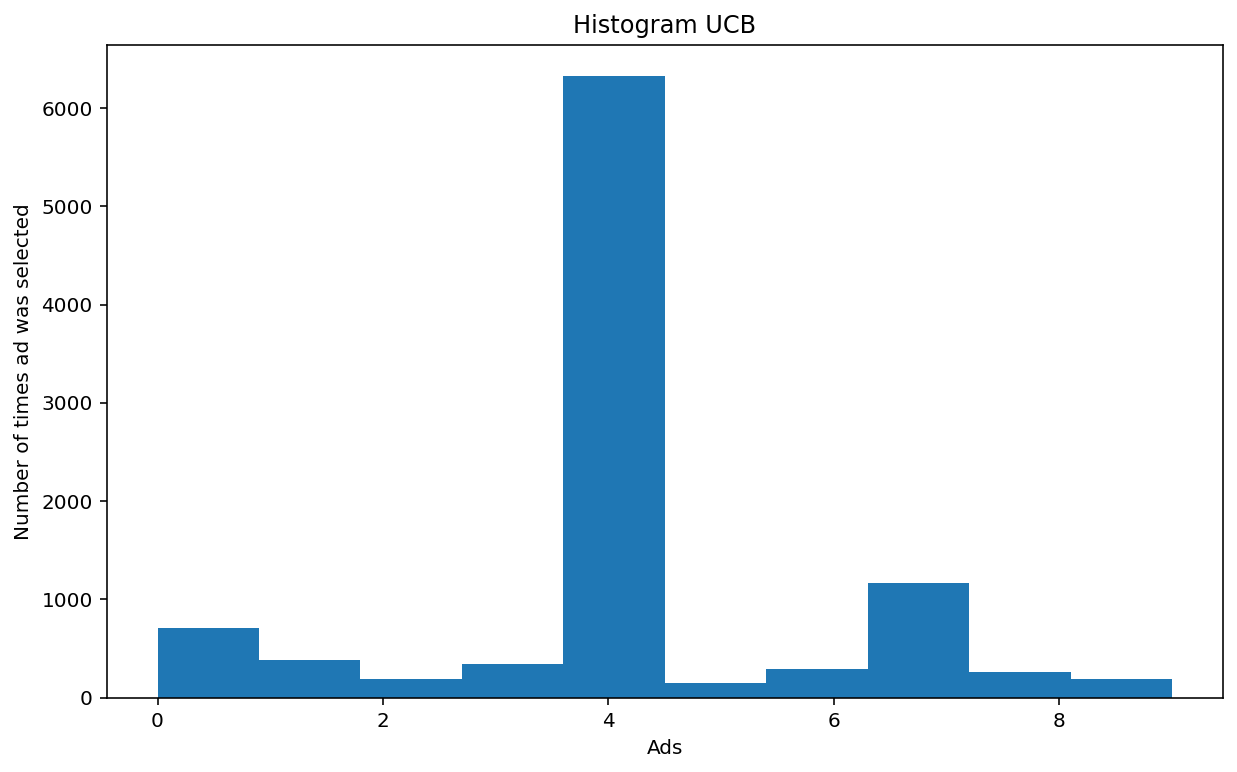

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.hist(ad_selected, bins=number_of_ads)
ax.set_title("Histogram UCB")
ax.set_xlabel("Ads")
ax.set_ylabel("Number of times ad was selected")
plt.show()